In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

warnings.filterwarnings('ignore')


sns.set(style='white', context='notebook', palette='deep')
%matplotlib inline

In [2]:
# 決定境界 と データセット を可視化する関数群
def plot_decision_boundary(classifier, X, y):
    x1 = np.linspace(X[:, 0].min() - 1.0,
                     X[:, 0].max() + 1.0,
                     num=100)
    x2 = np.linspace(X[:, 1].min() - 1.0,
                     X[:, 1].max() + 1.0,
                     num=100)

    x1, x2 = np.meshgrid(x1, x2)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = classifier.predict(X_new).reshape(100, 100)

    plt.contourf(x1, x2, y_pred, alpha=.2, cmap="spring")

    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])

# 線形分離不可能な場合その1

## データの準備

In [3]:
from sklearn.datasets import make_blobs

blobs = make_blobs(n_samples=100,
                   n_features=2,
                   centers=2,
                   cluster_std=4,
                   random_state=1)

X = blobs[0]
y = blobs[1]

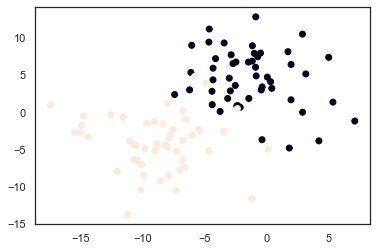

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## モデルの訓練

0.96
0.84


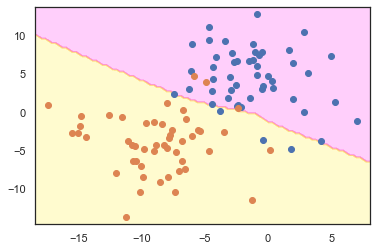

In [6]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=[10])

mlp.fit(X_train, y_train)

# スコアの表示
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

plot_decision_boundary(mlp, X, y)

0.96
0.88


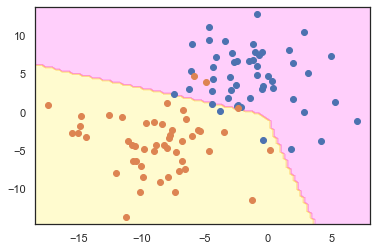

In [7]:
# 層の構成を変えてみる
mlp = MLPClassifier(hidden_layer_sizes=[100])

mlp.fit(X_train, y_train)

# スコアの表示
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

plot_decision_boundary(mlp, X, y)

0.9733333333333334
0.88


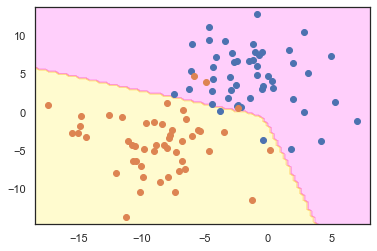

In [8]:
# 層の構成を変えてみる
mlp = MLPClassifier(hidden_layer_sizes=[100, 10])

mlp.fit(X_train, y_train)

# スコアの表示
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

plot_decision_boundary(mlp, X, y)

1.0
0.88


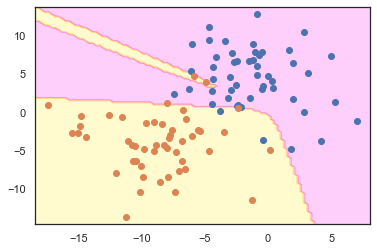

In [9]:
# 層の構成を変えてみる
mlp = MLPClassifier(hidden_layer_sizes=[100, 100, 100, 100])

mlp.fit(X_train, y_train)

# スコアの表示
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

plot_decision_boundary(mlp, X, y)

# 線形分離不可能な場合その2

## データの準備

In [10]:
from sklearn.datasets import make_moons

moon = make_moons(n_samples=100, noise=0.2, random_state=0)

X = moon[0]
y = moon[1]

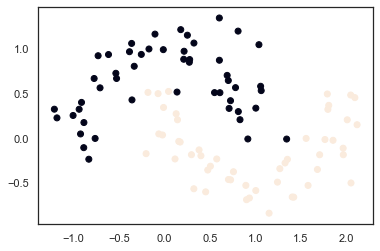

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## モデルの訓練

0.88
0.88


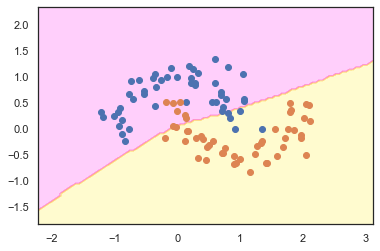

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=[100])

mlp.fit(X_train, y_train)

# スコアの表示
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

plot_decision_boundary(mlp, X, y)

0.96
0.96


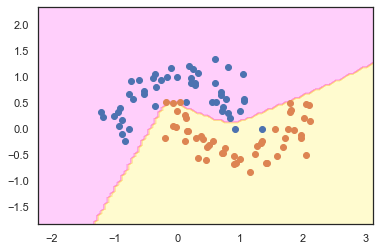

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=[100, 50])

mlp.fit(X_train, y_train)

# スコアの表示
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

plot_decision_boundary(mlp, X, y)

1.0
0.96


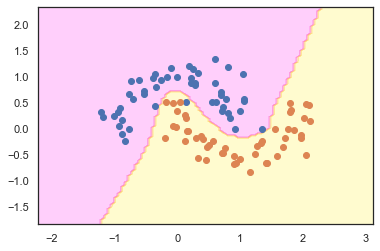

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=[100, 100, 100])

mlp.fit(X_train, y_train)

# スコアの表示
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

plot_decision_boundary(mlp, X, y)

0.9333333333333333
0.88


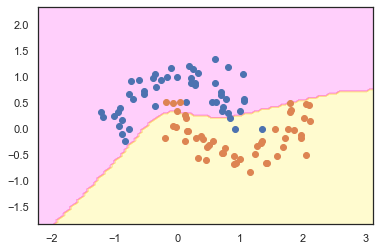

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=[10, 30, 9, 14])

mlp.fit(X_train, y_train)

# スコアの表示
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

plot_decision_boundary(mlp, X, y)

# 層の設計による違い

## 層の数による違い

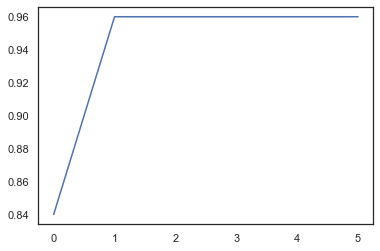

In [17]:
hidden_layers = [(100,),
                 (100, 1000, 1000),
                 (100, 10, 50),
                 (100, 10, 50, 20),
                 (10, 10, 50),
                 (10, 10, 40, 90, 10),
                 ]

test_scores = []

for layer in hidden_layers:
    mlp = MLPClassifier(hidden_layer_sizes=layer)

    mlp.fit(X_train, y_train)

    test_scores.append(mlp.score(X_test, y_test))

plt.plot(test_scores)

## ノードの数による違い

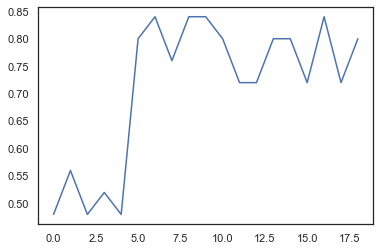

In [18]:
nodes = range(1,  20)

test_scores = []

for node in nodes:
    mlp = MLPClassifier(hidden_layer_sizes=node)

    mlp.fit(X_train, y_train)

    test_scores.append(mlp.score(X_test, y_test))

plt.plot(test_scores)